# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [473]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.linear_model import LinearRegression

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [474]:
print("Чтобы при последующих запусках ядра результат работы кода не менялся")

Чтобы при последующих запусках ядра результат работы кода не менялся


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [475]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [476]:
# your code here
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [477]:
# your code here
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [478]:
df_test.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [479]:
df_train.describe()  # числовые признаки для df_train

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [480]:
# your code here
df_test.describe()  # числовые признаки для df_test

,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


In [481]:
df_train.describe(include='object')  # категориальные признаки для df_train

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


In [482]:
df_test.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


In [483]:
# your code here
'''
Как можем видеть, сюда попали некоторые числовые признаки (например mileage). Причина - в этих столбцах 
присутствуют нечисловые данные, в данном случае это единицы измерения "kmpl", которые Pandas рассматривает как 
категориальные единицы.
'''
df_test.describe(include='object')  # категориальные признаки для df_test


,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [484]:
print('--- Данные по NaN в df_train ---\n')
for column in df_train.columns:
    print(f'Кол-во NaN строк в столбце {column}: {len(df_train[df_train[column].isna()])}')
print('\n\n--- Данные по NaN в df_test ---\n')
for column in df_test.columns:
    print(f'Кол-во NaN строк в столбце {column}: {len(df_test[df_test[column].isna()])}')
    

--- Данные по NaN в df_train ---

Кол-во NaN строк в столбце name: 0
Кол-во NaN строк в столбце year: 0
Кол-во NaN строк в столбце selling_price: 0
Кол-во NaN строк в столбце km_driven: 0
Кол-во NaN строк в столбце fuel: 0
Кол-во NaN строк в столбце seller_type: 0
Кол-во NaN строк в столбце transmission: 0
Кол-во NaN строк в столбце owner: 0
Кол-во NaN строк в столбце mileage: 202
Кол-во NaN строк в столбце engine: 202
Кол-во NaN строк в столбце max_power: 196
Кол-во NaN строк в столбце torque: 203
Кол-во NaN строк в столбце seats: 202


--- Данные по NaN в df_test ---

Кол-во NaN строк в столбце name: 0
Кол-во NaN строк в столбце year: 0
Кол-во NaN строк в столбце selling_price: 0
Кол-во NaN строк в столбце km_driven: 0
Кол-во NaN строк в столбце fuel: 0
Кол-во NaN строк в столбце seller_type: 0
Кол-во NaN строк в столбце transmission: 0
Кол-во NaN строк в столбце owner: 0
Кол-во NaN строк в столбце mileage: 19
Кол-во NaN строк в столбце engine: 19
Кол-во NaN строк в столбце max_power

Как можно видеть, пропуски есть в следующих колонках: mileage, engine, max_power, torque, seats

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [485]:
# your code here
print(f"В df_train присутствует {len(df_train[df_train.duplicated(['name','year','km_driven','fuel','seller_type','transmission','owner','mileage','engine','max_power','torque','seats'])])} повторяющихся строк")

В df_train присутствует 1159 повторяющихся строк


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [486]:
# your code here
df_train[df_train.duplicated(['name','year','km_driven','fuel','seller_type','transmission','owner','mileage','engine','max_power','torque','seats'])]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [487]:
# your code here
df_train = df_train.drop(labels=list(df_train[df_train.duplicated(['name','year','km_driven','fuel','seller_type','transmission','owner','mileage','engine','max_power','torque','seats'])].index))

In [488]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [489]:
# your code here
df_train = df_train.reset_index(drop=True)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [490]:
# df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
# df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

def normal_torque(x):
    if 'at' in str(x):
        new_torque = x.split('at')[0]
        max_torque_rpm = x.split('at')[1]
        if '-' in max_torque_rpm:
            max_torque_rpm = max_torque_rpm.split('-')[1]
        return [str(new_torque), str(max_torque_rpm)]
    if str(x).count('@') == 1:
        new_torque = x.split('@')[0]
        max_torque_rpm = x.split('@')[1]
        if '-' in max_torque_rpm:
            max_torque_rpm = max_torque_rpm.split('-')[1]
        return [str(new_torque), str(max_torque_rpm)]
    elif str(x).count('@') == 2:
        new_torque = x.split('@')[0]
        max_torque_rpm = x.split('@')[1].split('(')[0]
        if '-' in max_torque_rpm:
            max_torque_rpm = max_torque_rpm.split('-')[1]
        return [str(new_torque), str(max_torque_rpm)]
    return str(x)
df_train['torque'] = df_train['torque'].apply(normal_torque)
df_test['torque'] = df_test['torque'].apply(normal_torque)

def normal_units(x):
    try:
        if float(re.findall(r'\d+', str(x))[0]) > 80:
            return float(re.findall(r'\d+', str(x))[0]) * 0.1019716  # перевод из Nm в kgm
        return float(re.findall(r'\d+', str(x))[0])
    except:
        return None

def normal_max_torque_rpm(x):
    try:
        return float(re.findall(r'\d+,?.?\d+', str(x))[0].replace(',',''))
    except:
        return None
df_train['max_torque_rpm'] = df_train['torque'].apply(lambda x: x[1])
df_train['torque'] = df_train['torque'].apply(lambda x: x[0])
df_train['torque'] = df_train['torque'].apply(normal_units)
df_train['max_torque_rpm'] = df_train['max_torque_rpm'].apply(normal_max_torque_rpm)

df_test['max_torque_rpm'] = df_test['torque'].apply(lambda x: x[1])
df_test['torque'] = df_test['torque'].apply(lambda x: x[0])
df_test['torque'] = df_test['torque'].apply(normal_units)
df_test['max_torque_rpm'] = df_test['max_torque_rpm'].apply(normal_max_torque_rpm)

df_test

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,26.512616,7.0,2200.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,26.512616,5.0,2750.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,17.539115,5.0,4300.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,20.394320,5.0,1750.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,9.789274,5.0,3000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,10.095188,5.0,4500.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,11.624762,5.0,4000.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.000000,5.0,2750.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,11.318848,5.0,4000.0


У меня вышло разделить torque!

In [491]:
# your code here
def normal_values(value):
    try:
        return float(str(value).split()[0])
    except:
        return None
df_train['mileage'] = df_train['mileage'].apply(normal_values)
df_train['engine'] = df_train['engine'].apply(normal_values)
df_train['max_power'] = df_train['max_power'].apply(normal_values)

df_test['mileage'] = df_test['mileage'].apply(normal_values)
df_test['engine'] = df_test['engine'].apply(normal_values)
df_test['max_power'] = df_test['max_power'].apply(normal_values)

# df_train = df_train.drop(columns=['torque'])
# df_test = df_test.drop(columns=['torque'])

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [492]:
# your code here
for column in ['mileage','engine','max_power','seats','torque','max_torque_rpm']:
    df_train[column] = df_train[column].fillna(df_train[column].median())
for column in df_train.columns:
    print(f'Кол-во NaN строк в столбце {column}: {len(df_train[df_train[column].isna()])}')
print('\n\n')
for column in ['mileage','engine','max_power','seats','torque','max_torque_rpm']:
    df_test[column] = df_test[column].fillna(df_test[column].median())
for column in df_test.columns:
    print(f'Кол-во NaN строк в столбце {column}: {len(df_test[df_test[column].isna()])}')

Кол-во NaN строк в столбце name: 0
Кол-во NaN строк в столбце year: 0
Кол-во NaN строк в столбце selling_price: 0
Кол-во NaN строк в столбце km_driven: 0
Кол-во NaN строк в столбце fuel: 0
Кол-во NaN строк в столбце seller_type: 0
Кол-во NaN строк в столбце transmission: 0
Кол-во NaN строк в столбце owner: 0
Кол-во NaN строк в столбце mileage: 0
Кол-во NaN строк в столбце engine: 0
Кол-во NaN строк в столбце max_power: 0
Кол-во NaN строк в столбце torque: 0
Кол-во NaN строк в столбце seats: 0
Кол-во NaN строк в столбце max_torque_rpm: 0



Кол-во NaN строк в столбце name: 0
Кол-во NaN строк в столбце year: 0
Кол-во NaN строк в столбце selling_price: 0
Кол-во NaN строк в столбце km_driven: 0
Кол-во NaN строк в столбце fuel: 0
Кол-во NaN строк в столбце seller_type: 0
Кол-во NaN строк в столбце transmission: 0
Кол-во NaN строк в столбце owner: 0
Кол-во NaN строк в столбце mileage: 0
Кол-во NaN строк в столбце engine: 0
Кол-во NaN строк в столбце max_power: 0
Кол-во NaN строк в столбце to


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [493]:
print("Потому что в столбце seats есть всего 9 возможных значений объектов, так что в целом лучше сделать её категориальной")


Потому что в столбце seats есть всего 9 возможных значений объектов, так что в целом лучше сделать её категориальной


In [494]:
# your code here
df_train['engine'] = df_train['engine'].apply(lambda x: int(x))
df_train['seats'] = df_train['seats'].apply(lambda x: int(x))

df_test['engine'] = df_test['engine'].apply(lambda x: int(x))
df_test['seats'] = df_test['seats'].apply(lambda x: int(x))

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

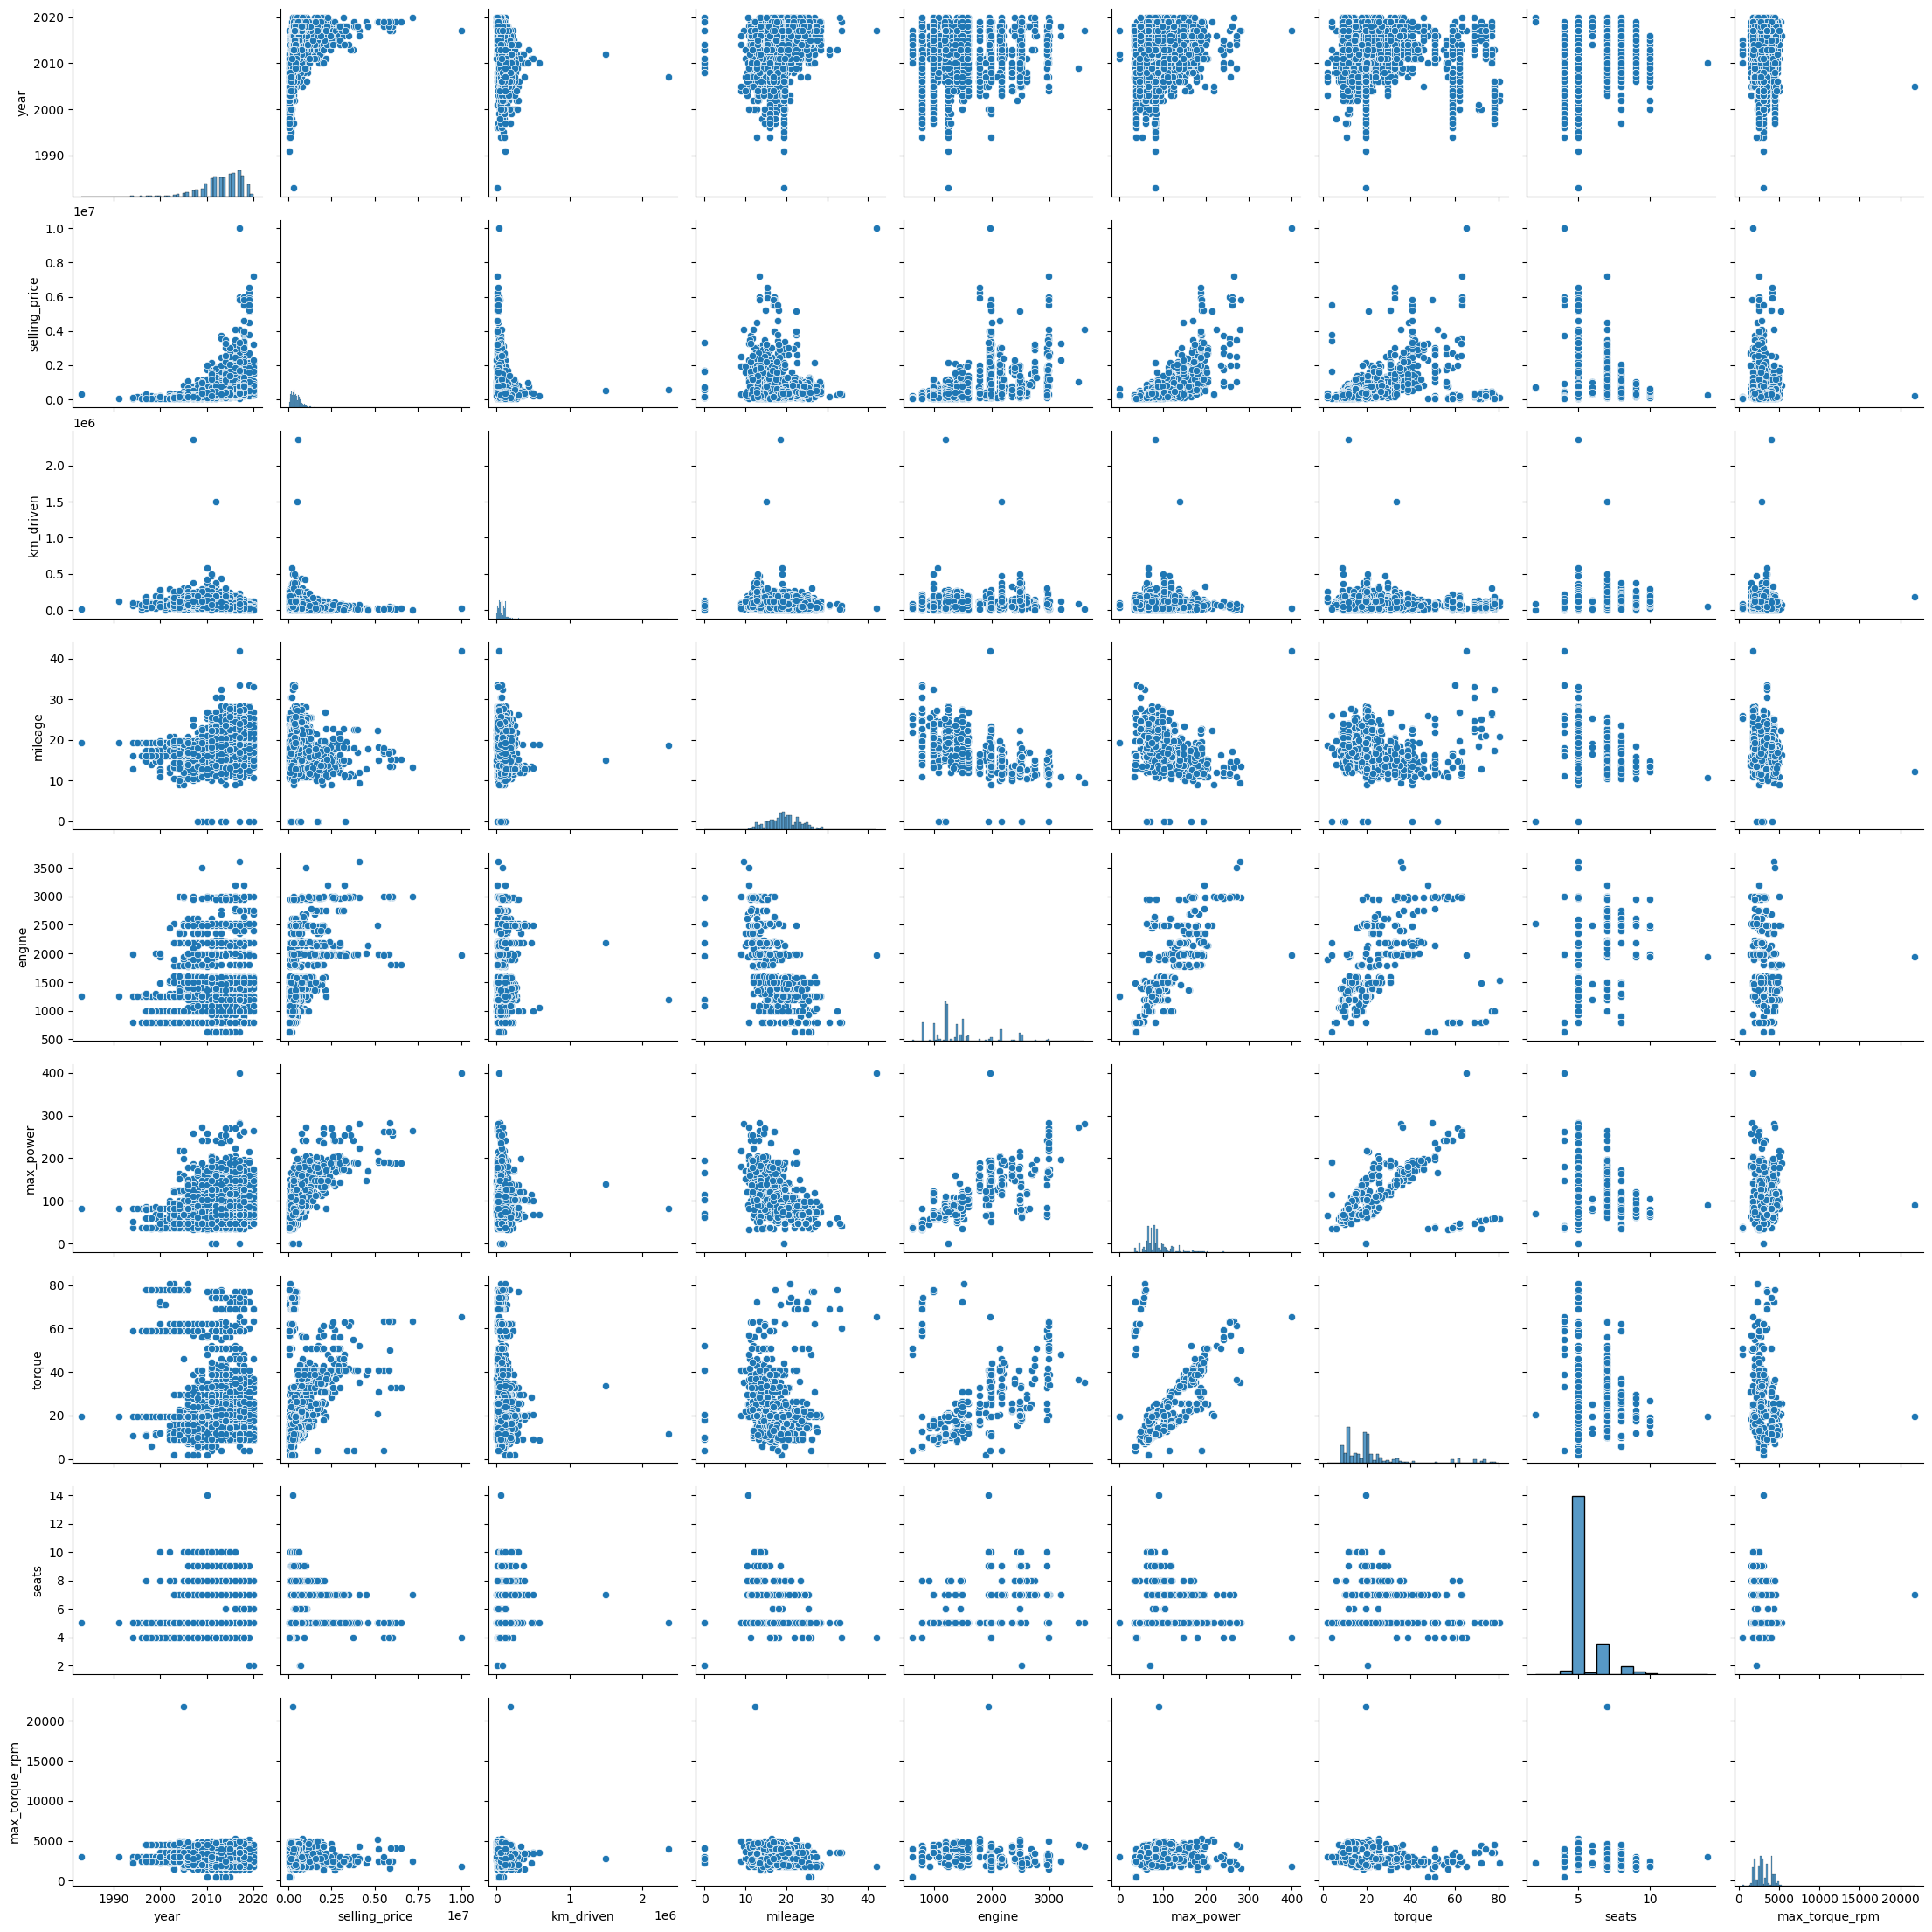

In [495]:
# your code here
sns.pairplot(df_train)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

In [496]:
print(
'''
Больше всего с целевой переменной связаны признаки max_power, engine и year(корреляция 0.69, 0.45 и 0.43 соответственно). 
Меньше связан признак seats (0.15). Признаки km_driven и mileage имеют отрицательную корреляцию.
'''
)


Больше всего с целевой переменной связаны признаки max_power, engine и year(корреляция 0.69, 0.45 и 0.43 соответственно). 
Меньше связан признак seats (0.15). Признаки km_driven и mileage имеют отрицательную корреляцию.



<Axes: >

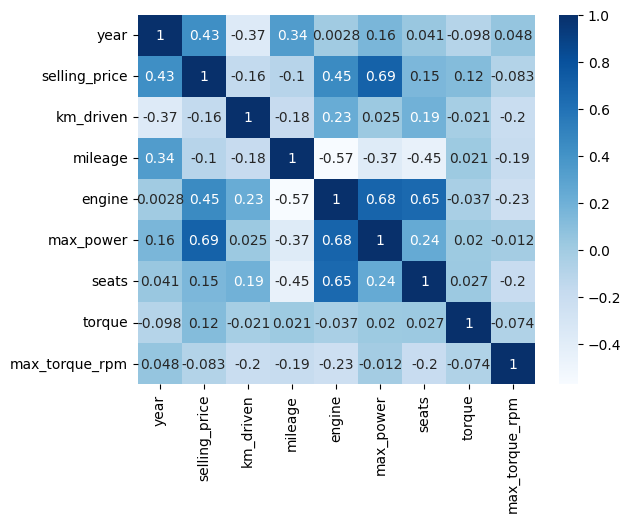

In [497]:
corr = df_train[['year','selling_price', 'km_driven','mileage','engine','max_power','seats','torque','max_torque_rpm']].corr()
sns.heatmap(corr, cmap="Blues", annot=True)

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

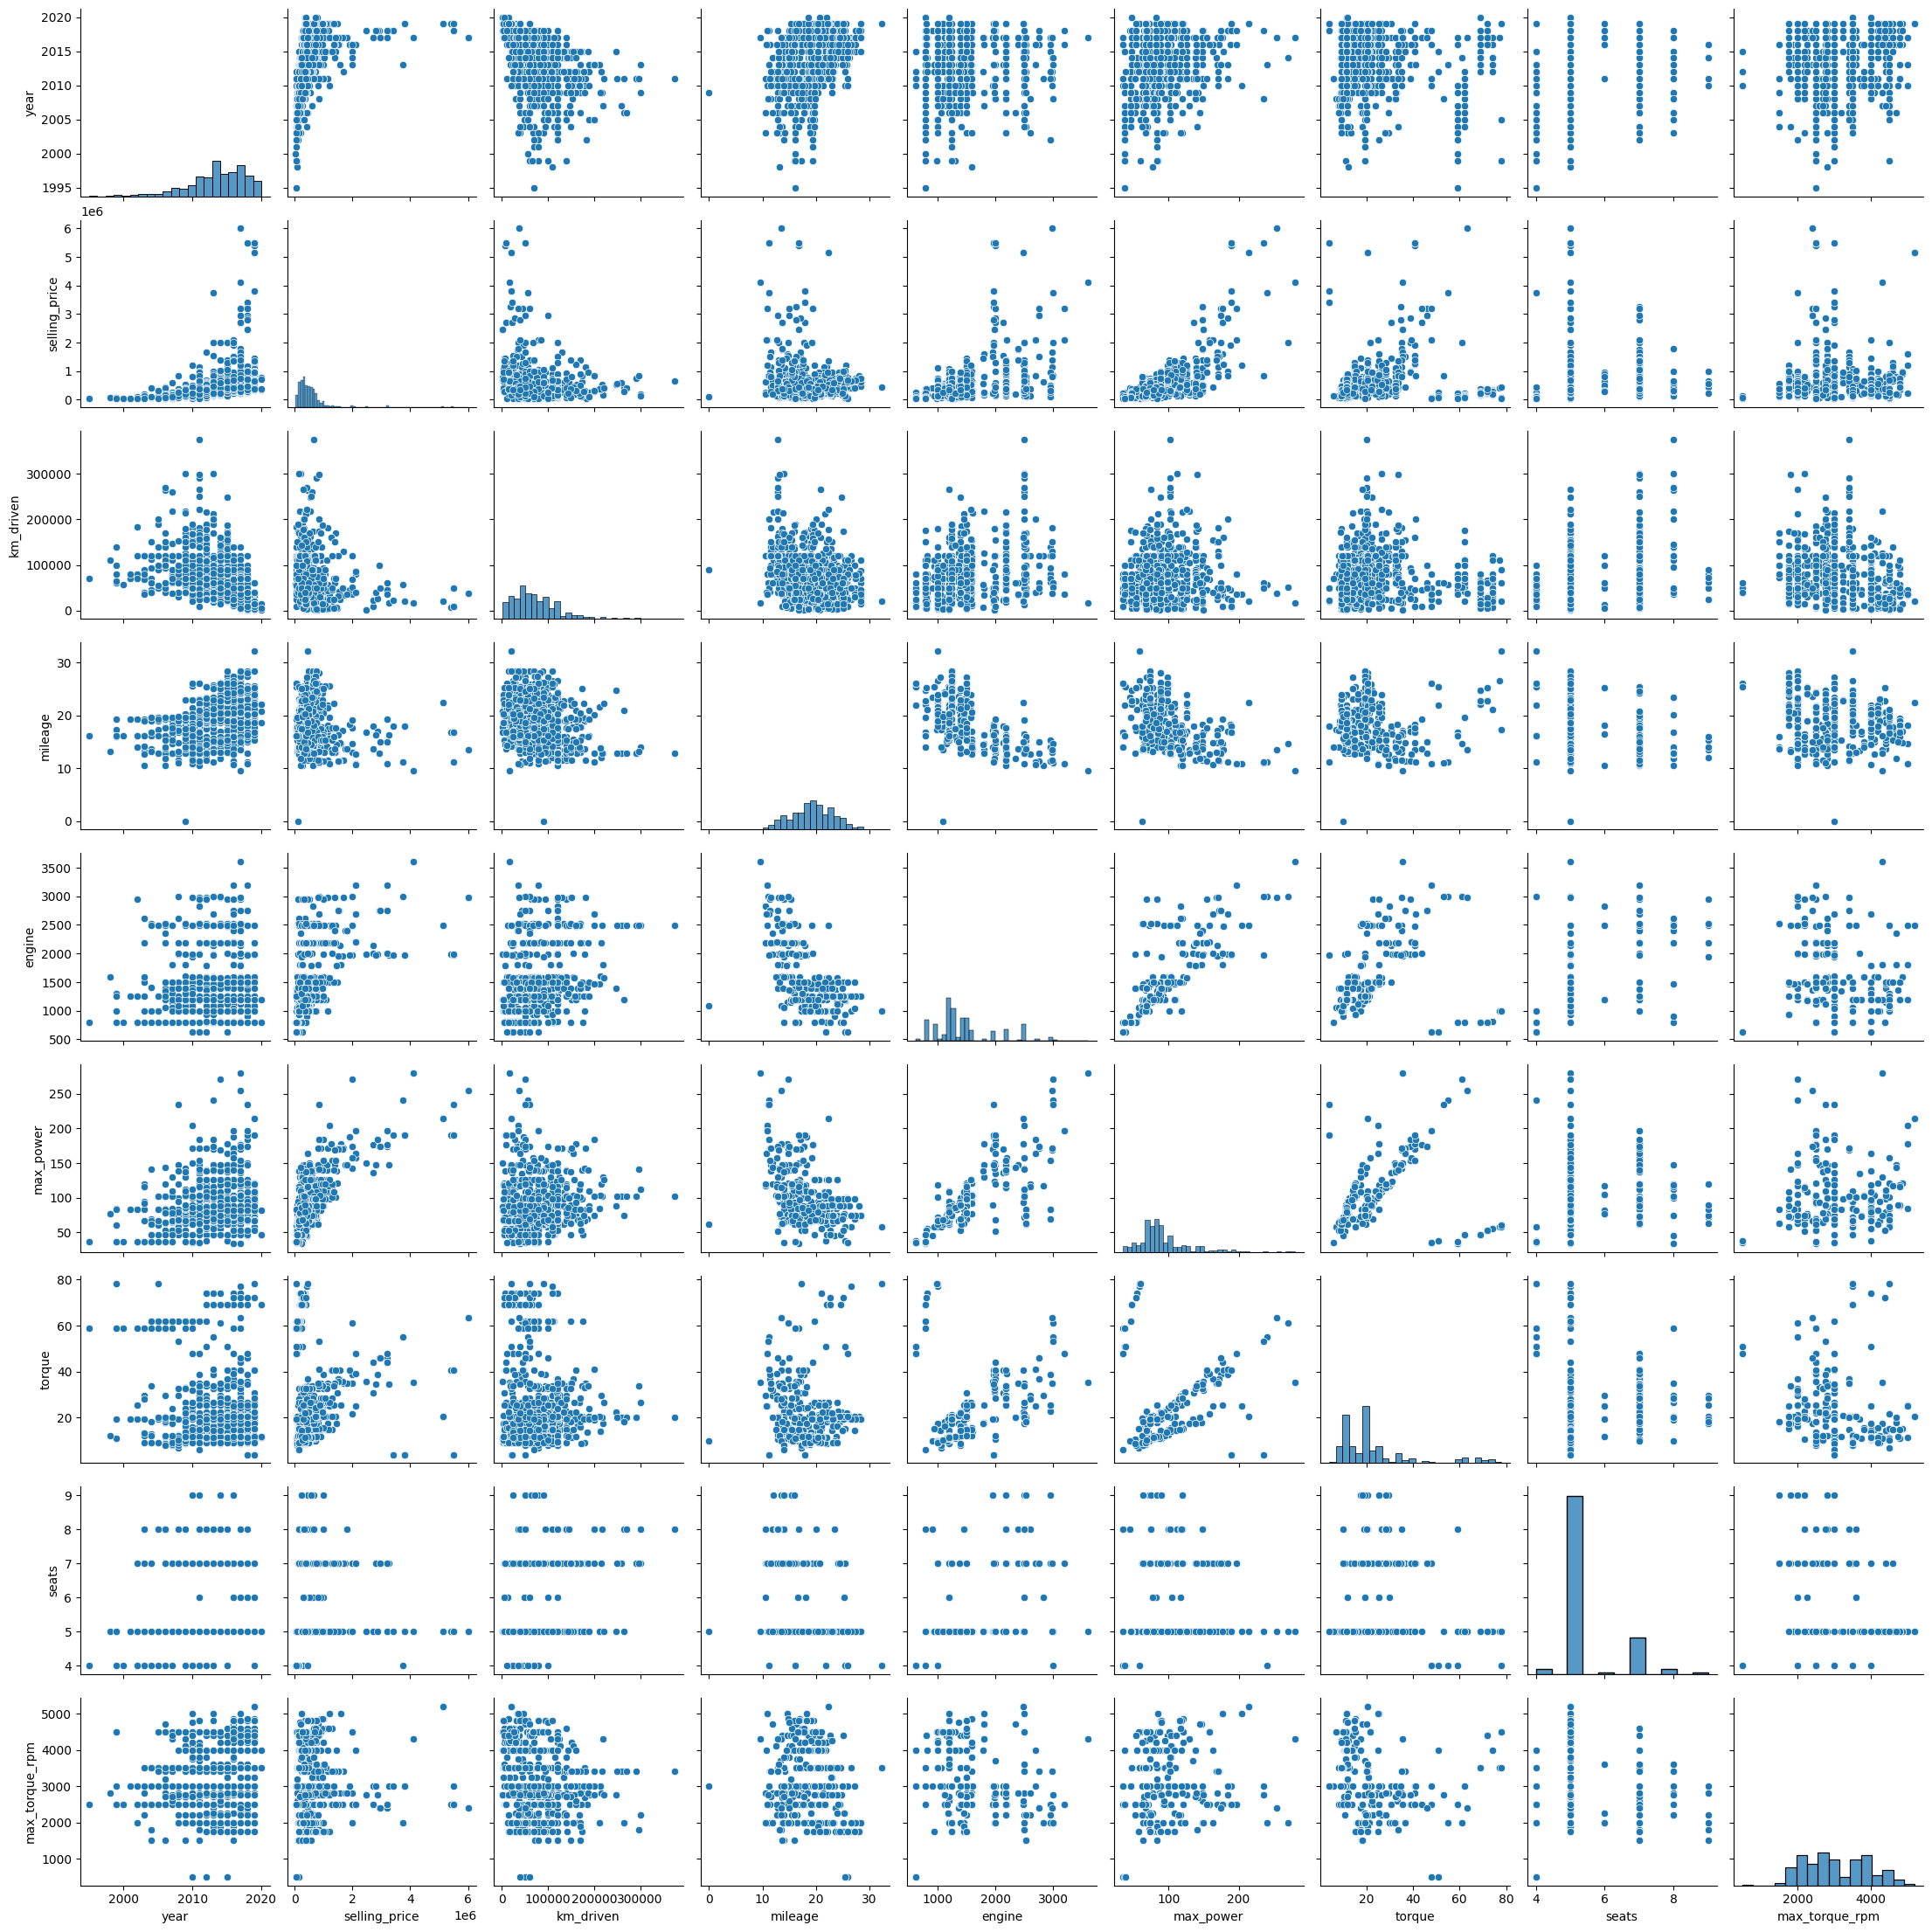

In [498]:
# your code here
sns.pairplot(df_test)

In [499]:
print(
'''
Да, схожесть совокупностей df_train и df_test наглядно можно увидеть, просто посмотрев на оба распределения. Они отличаются,
но не сильно
'''
)


Да, схожесть совокупностей df_train и df_test наглядно можно увидеть, просто посмотрев на оба распределения. Они отличаются,
но не сильно



(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

<Axes: >

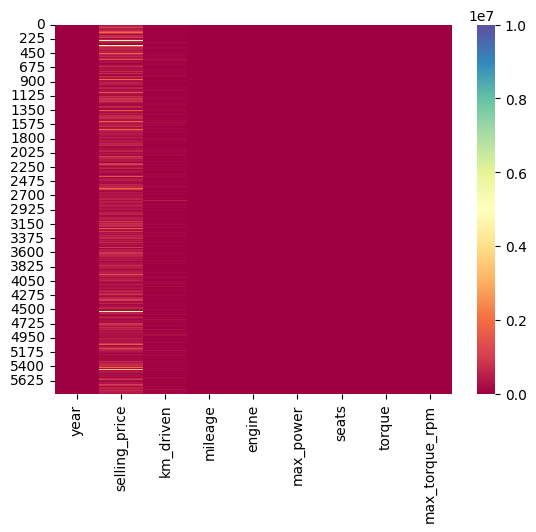

In [500]:
# your code here
sns.heatmap(df_train[['year','selling_price', 'km_driven','mileage','engine','max_power','seats','torque','max_torque_rpm']], cmap="Spectral")

<Axes: >

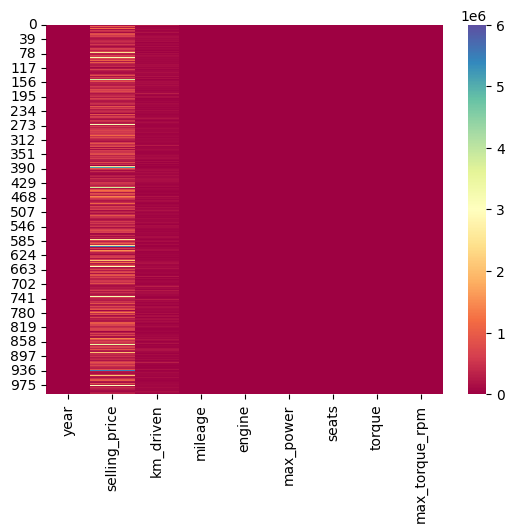

In [501]:
sns.heatmap(df_test[['year','selling_price', 'km_driven','mileage','engine','max_power','seats','torque','max_torque_rpm']], cmap="Spectral")

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

In [502]:
print(
'''
Признаки mileage и engine наименее скоррелированы между собой;
Сильная положительная линейная зависимость наблюдается между признаками max_power и selling_price, а также между 
max_power и engine;
Я думаю это верное утверждение, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи. Если
посмотреть на график распределения year и km_driven, можем увидеть, как он смещается в левый верхний угол

'''
)


Признаки mileage и engine наименее скоррелированы между собой;
Сильная положительная линейная зависимость наблюдается между признаками max_power и selling_price, а также между 
max_power и engine;
Я думаю это верное утверждение, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи. Если
посмотреть на график распределения year и km_driven, можем увидеть, как он смещается в левый верхний угол




(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

<Axes: xlabel='max_power', ylabel='selling_price'>

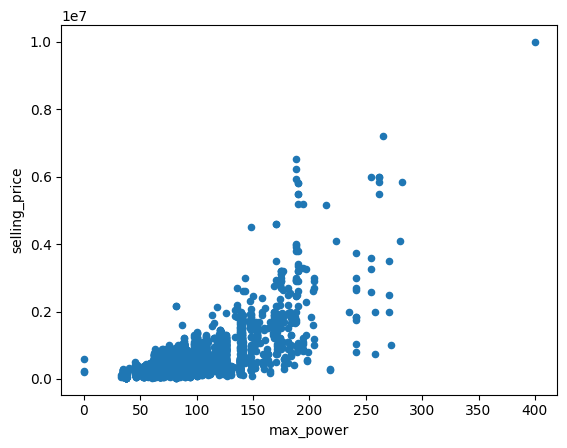

In [503]:
# your code here
df_train.plot.scatter(x = 'max_power', y = 'selling_price')

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

<Axes: >

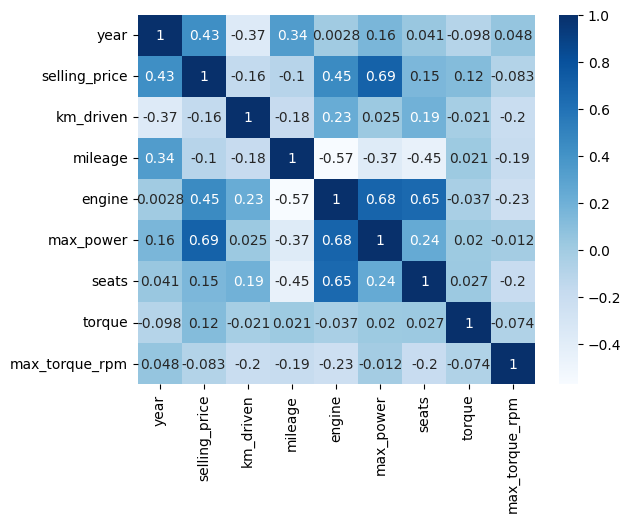

In [504]:
# your code here
'''
Я уже рисовал таблицу корреляция ранее, хотя такого задания не было. Как мне кажется, это важная визуализация. На ней 
мы можем наблюдать значения корреляции признаков и делать соответствующие выводы и том, какие признаки больше всего связаны
'''
corr = df_train[['year','selling_price', 'km_driven','mileage','engine','max_power','seats','torque','max_torque_rpm']].corr()
sns.heatmap(corr, cmap="Blues", annot=True)

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [505]:
y_train = df_train['selling_price'].copy()
X_train = df_train[['year', 'km_driven','mileage','engine','max_power','seats','torque','max_torque_rpm']].copy()

In [506]:
assert X_train.shape == (5840, 8)

In [507]:
y_test = df_test['selling_price'].copy()
X_test = df_test[['year', 'km_driven','mileage','engine','max_power','seats','torque','max_torque_rpm']].copy()

In [508]:
assert X_test.shape == (1000, 8)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [509]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()

model.fit(X_train, y_train)


LinearRegression()

In [510]:
model.coef_

array([ 4.34305447e+04, -7.22962375e-01, -2.82948010e+03,  9.12154685e+01,
        1.00534938e+04, -4.33759993e+04,  4.44591765e+03, -5.75320020e+01])

In [511]:
prediction = model.predict(X_train)
print(f"MSE для трейна: {MSE(y_train, prediction)}")
print(f"R2 для трейна: {r2_score(y_train, prediction)}\n")
prediction = model.predict(X_test)
print(f"MSE для теста: {MSE(y_test, prediction)}")
print(f"R2 для теста: {r2_score(y_test, prediction)}")


MSE для трейна: 109520427170.27213
R2 для трейна: 0.6179142406500808

MSE для теста: 220812808924.27545
R2 для теста: 0.61586318780036


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [512]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

normalized_X_train = scaler.fit_transform(X_train)
normalized_X_test = scaler.fit_transform(X_test)

In [513]:
normalized_X_train

array([[ 0.13956959,  1.19115249,  0.995867  , ..., -0.43441899,
        -0.22155962, -1.13776873],
       [ 0.13956959,  0.76661943,  0.42883018, ..., -0.43441899,
         0.15830359, -0.59126015],
       [-0.83716668,  0.88315792,  0.8955065 , ..., -0.43441899,
        -0.05855813, -0.31800586],
       ...,
       [-0.10461448,  0.60013588, -0.2335491 , ..., -0.43441899,
        -0.70905075,  1.0482656 ],
       [-1.56971888,  0.74997108, -0.66008122, ..., -0.43441899,
         0.06561475, -0.31800586],
       [-1.08135075,  0.76661943, -0.03282811, ..., -0.43441899,
        -0.22155962, -1.13776873]])

Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [514]:
# your code here
print(f"km_driven оказался наиболее информативным в предсказании цены")

km_driven оказался наиболее информативным в предсказании цены


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [515]:
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=1)

model_lasso.fit(normalized_X_train, y_train)


Lasso(alpha=1)

In [516]:
prediction = model_lasso.predict(normalized_X_train)
print(f"MSE для трейна: {MSE(y_train, prediction)}")
print(f"R2 для трейна: {r2_score(y_train, prediction)}\n")
prediction = model_lasso.predict(normalized_X_test)
print(f"MSE для теста: {MSE(y_test, prediction)}")
print(f"R2 для теста: {r2_score(y_test, prediction)}")

MSE для трейна: 109520427185.63765
R2 для трейна: 0.6179142405964749

MSE для теста: 237366309194.35245
R2 для теста: 0.5870659053624833


In [517]:
model_lasso.coef_

array([177857.42544666, -43424.62423126, -11273.9193021 ,  44293.66268249,
       318070.85675109, -42602.30164204,  71607.14128631, -52633.87806746])

<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [518]:
print(
'''
Нет, не занулила. Скорее всего, это связано с тем, что все признаки коррелируют с целевой переменной более-менее нормально,
то есть там нет слишком низких корреляций (околонулевых), поэтому L1 не занулила ни один параметр
'''
)


Нет, не занулила. Скорее всего, это связано с тем, что все признаки коррелируют с целевой переменной более-менее нормально,
то есть там нет слишком низких корреляций (околонулевых), поэтому L1 не занулила ни один параметр



(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [519]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

model = Lasso() 
lasso_params = {'alpha':list(range(1,500000,1000))}
_ =grid = GridSearchCV(model, lasso_params, cv=10)
_ =grid.fit(normalized_X_train, y_train)
grid.best_params_

{'alpha': 19001}

In [520]:
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=list(grid.best_params_.values())[0])

model_lasso.fit(normalized_X_train, y_train)

model_lasso.coef_

array([155602.383407  , -24829.76000643,      0.        ,      0.        ,
       326792.09503502,     -0.        ,  49258.69994394, -30189.66620015])

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

In [521]:
print(f"500000/1000 = 500 моделей")

500000/1000 = 500 моделей


<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [522]:
print(f"Лучший коэффициент регуляризации: {list(grid.best_params_.values())[0]}. Трое весов при этом занулились")

Лучший коэффициент регуляризации: 19001. Трое весов при этом занулились


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [523]:
from sklearn.linear_model import ElasticNet

model = ElasticNet() 
# elfstic_params = {'alpha':list(range(1,500000,1000))}

elfstic_params = {'alpha':list(np.arange(0, 2, 0.1)),
                  'l1_ratio':[0.85, 0.89, 0.9, 0.95, 1]}
_ =grid = GridSearchCV(model, elfstic_params, cv=10)
_ =grid.fit(normalized_X_train, y_train)
grid.best_params_

C:\Users\vlad2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\vlad2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\vlad2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.380e+14, tolerance: 1.247e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers i

{'alpha': 1.3, 'l1_ratio': 0.9}

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [524]:
print(f"alpha: {list(grid.best_params_.values())[0]}\nl1_ratio: {list(grid.best_params_.values())[1]}")

alpha: 1.3
l1_ratio: 0.9


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



In [525]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,19.374604,5,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,25.492900,5,2500.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.000000,5,2750.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,11.000000,5,4500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,11.522791,5,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,9.789274,5,3000.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,9.177444,5,3500.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,11.522791,5,4000.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,24.000000,5,2750.0


(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [526]:

X_train_cat = df_train.drop(columns=['selling_price','name']).copy()


In [527]:
assert X_train_cat.shape == (5840, 12)

In [528]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [529]:
X_train_cat

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,19.374604,5,2000.0
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,25.492900,5,2500.0
2,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.000000,5,2750.0
3,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,11.000000,5,4500.0
4,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,11.522791,5,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5835,2008,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,9.789274,5,3000.0
5836,2013,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,9.177444,5,3500.0
5837,2013,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,11.522791,5,4000.0
5838,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,24.000000,5,2750.0


In [530]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

X_train_cat = df_train.drop(columns=['selling_price','name']).copy()

encoder = OneHotEncoder(handle_unknown='ignore')

for column in list(X_train_cat.describe(include='object').columns) + ['seats']:
    encoder_df = pd.DataFrame(encoder.fit_transform(X_train_cat[[column]]).toarray())
    X_train_cat = X_train_cat.join(encoder_df)
    X_train_cat = X_train_cat.drop(columns=[column])  # избавляемся от оригинального столбца
    X_train_cat = X_train_cat.drop(columns=[0])  # и от первого столбца, согласно заданию выше
    X_train_cat.rename(columns = {0:f"{column}_0", 
                                  1:f"{column}_1", 
                                  2:f"{column}_2", 
                                  3:f"{column}_3",
                                  4:f"{column}_4",
                                  5:f"{column}_5",
                                  6:f"{column}_6",
                                  7:f"{column}_7",
                                  8:f"{column}_8"},inplace = True )
X_train_cat


,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,fuel_1,fuel_2,fuel_3,...,owner_3,owner_4,seats_1,seats_2,seats_3,seats_4,seats_5,seats_6,seats_7,seats_8
0,2014,145500,23.40,1248,74.00,19.374604,2000.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014,120000,21.14,1498,103.52,25.492900,2500.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010,127000,23.00,1396,90.00,22.000000,2750.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2007,120000,16.10,1298,88.20,11.000000,4500.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017,45000,20.14,1197,81.86,11.522791,4000.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,2008,191000,17.92,1086,62.10,9.789274,3000.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5836,2013,50000,18.90,998,67.10,9.177444,3500.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5837,2013,110000,18.50,1197,82.85,11.522791,4000.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5838,2007,119000,16.80,1493,110.00,24.000000,2750.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [531]:
scaler = StandardScaler()

normalized_X_train_cat = scaler.fit_transform(X_train_cat)  # СТАНДАРТИЗУЕМ

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [532]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

model = Ridge() 

elfstic_params = {'alpha':list(np.arange(0, 1000, 1))}
_ =grid = GridSearchCV(model, elfstic_params, cv=10)
_ =grid.fit(normalized_X_train_cat, y_train)
best_params = grid.best_params_
best_params

C:\Users\vlad2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.74966e-31): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


{'alpha': 541}

In [533]:
prediction

array([ 5.59605577e+05,  9.20640014e+05,  4.19459500e+05,  6.31796515e+05,
        1.17231987e+05,  1.07974889e+06,  2.80955540e+04,  2.96307131e+05,
        1.28709378e+05,  1.02017004e+06,  1.09545651e+06,  1.89199750e+06,
        8.51566566e+05,  5.78437665e+04,  6.70110448e+05,  2.65154345e+06,
        4.33063536e+05,  1.62441628e+05,  3.40685526e+05,  4.20839864e+05,
        2.88124218e+05, -6.07366408e+04,  9.61481244e+05,  1.91359857e+05,
        5.65600961e+05,  6.30685262e+05,  1.05916911e+06,  1.02421909e+06,
        3.21976688e+05,  6.20973411e+05,  1.09229479e+06,  9.52885881e+05,
        4.41128790e+05,  5.71609127e+05,  2.94662612e+05,  2.73718962e+05,
        4.33916945e+05,  2.56942553e+05,  4.09926203e+05,  7.63060653e+05,
        3.14957853e+05,  3.68447740e+05,  1.91350356e+05,  3.07200554e+05,
        5.01356470e+05,  1.90691297e+05,  2.13871196e+05,  1.16532560e+05,
        5.16895715e+05,  6.40112306e+05,  3.41804392e+05,  1.47328127e+05,
        6.63265322e+05,  

In [534]:
model_ridge = Ridge(alpha=list(best_params.values())[0])

model_ridge.fit(normalized_X_train_cat, y_train)

prediction = model_ridge.predict(normalized_X_train_cat)
print(f"MSE для трейна: {MSE(y_train, prediction)}")
print(f"R2 для трейна: {r2_score(y_train, prediction)}\n")

MSE для трейна: 93017871840.03181
R2 для трейна: 0.6754869834477866



как можно заметить, обе ошибки стали меньше

# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

Во-первых, обновим столбец year, приведя его значения к квадратичным

In [535]:
X_train['year'] = X_train['year'].apply(lambda x: x**0.5)
X_train

,year,km_driven,mileage,engine,max_power,seats,torque,max_torque_rpm
0,44.877611,145500,23.40,1248,74.00,5,19.374604,2000.0
1,44.877611,120000,21.14,1498,103.52,5,25.492900,2500.0
2,44.833024,127000,23.00,1396,90.00,5,22.000000,2750.0
3,44.799554,120000,16.10,1298,88.20,5,11.000000,4500.0
4,44.911023,45000,20.14,1197,81.86,5,11.522791,4000.0
...,...,...,...,...,...,...,...,...
5835,44.810713,191000,17.92,1086,62.10,5,9.789274,3000.0
5836,44.866469,50000,18.90,998,67.10,5,9.177444,3500.0
5837,44.866469,110000,18.50,1197,82.85,5,11.522791,4000.0
5838,44.799554,119000,16.80,1493,110.00,5,24.000000,2750.0


Во-вторых, я решил добавить столбец с годом основания компании, которая выпускает эти машины (чем старше компания, тем, наверное, более дорогие машины она производит). Если посмотреть на столбец name, можем увидеть, что для каждого названия машины первое слово - это компания, которая её производит. Воспользуемся этим.

In [536]:
'''
Сначала создадим столбец, в котором будут названия компании, которая произвела автомобиль. Если вызвать 
set(df_train['name'].apply(lambda x: x.split()[0])), можно увидеть, что их не так уж и много.
'''
X_train['create_year'] = df_train['name'].apply(lambda x: x.split()[0])

In [537]:
'''
Далее я для каждой компании выписал приставку, которая будет вставлятся в wikipedia для парсинга. Да, это можно было
автоматизировать, но я немного криворукий, так что теперь у нас есть словарь с приставками
'''

APC = {'Ambassador': None,
       'Audi': 'Audi',
       'BMW': 'BMW',
       'Chevrolet': 'Chevrolet',
       'Daewoo': 'Daewoo',
       'Datsun': 'Datsun',
       'Fiat': 'Fiat',
       'Force': 'Force_Motors',
       'Ford': 'Ford',
       'Honda': 'Honda',
       'Hyundai': 'Hyundai_Motor',
       'Isuzu': 'Isuzu',
       'Jaguar': 'Jaguar',
       'Jeep': 'Jeep',
       'Kia': 'Kia_Motors',
       'Land': 'Land_Rover',
       'Lexus': 'Lexus',
       'MG': 'MG_Cars',
       'Mahindra': 'Mahindra_%26_Mahindra',
       'Maruti': 'Maruti_Suzuki',
       'Mercedes-Benz': 'Mercedes-Benz_Group',
       'Mitsubishi': 'Mitsubishi_Motors',
       'Nissan': 'Nissan',
       'Peugeot': 'Peugeot',
       'Renault': 'Renault',
       'Skoda': 'Škoda_Auto',
       'Tata': 'Tata_Motors',
       'Toyota': 'Toyota',
       'Volkswagen': 'Volkswagen_(концерн)',
       'Volvo': 'Volvo_Cars'}

car_values = APC.copy()  # сюда мы будем записывать название компании и float(год основания) в качестве значения

for car_company in APC:
    if APC[car_company] is None:
        continue
    url = f'https://ru.wikipedia.org/wiki/{APC[car_company]}'  # парсим страницу каждой компании на wikipedia
    page = requests.get(url).text
    soup = BeautifulSoup(page, "html.parser")
    for i in soup.find_all('span', {'data-wikidata-property-id':'P571'}):  # и вытаскиваем оттуда год основания компании
        car_values[car_company] = float(re.findall(r'\d{4}', str(i.get_text()))[0])

In [538]:
car_values["Ambassador"] = float(1958)  # теперь у нас есть значение года основания каждой компании, в том числе Ambassador

def create_a_company_year(x):  # функция для обновления значения в датафрейме путём поиска по словарю нужного значения
    global car_values
    try:
        return car_values[x]
    except:
        return float(1862)  # там есть компания Opel, которая вызывает ошибку, её год основания 1862, поэтому просто вернём его

X_train['create_year'] = X_train['create_year'].apply(create_a_company_year)

In [539]:
X_train  # и вот, теперь у нас есть ещё один столбец с годом основания

,year,km_driven,mileage,engine,max_power,seats,torque,max_torque_rpm,create_year
0,44.877611,145500,23.40,1248,74.00,5,19.374604,2000.0,1981.0
1,44.877611,120000,21.14,1498,103.52,5,25.492900,2500.0,1895.0
2,44.833024,127000,23.00,1396,90.00,5,22.000000,2750.0,1967.0
3,44.799554,120000,16.10,1298,88.20,5,11.000000,4500.0,1981.0
4,44.911023,45000,20.14,1197,81.86,5,11.522791,4000.0,1967.0
...,...,...,...,...,...,...,...,...,...
5835,44.810713,191000,17.92,1086,62.10,5,9.789274,3000.0,1967.0
5836,44.866469,50000,18.90,998,67.10,5,9.177444,3500.0,1981.0
5837,44.866469,110000,18.50,1197,82.85,5,11.522791,4000.0,1967.0
5838,44.799554,119000,16.80,1493,110.00,5,24.000000,2750.0,1967.0


Теперь попробуем обучить новую линейную регрессию и сравнить значения ошибок по сравнению со старой версией

In [541]:
new_model = LinearRegression()

new_model.fit(X_train, y_train)

prediction = new_model.predict(X_train)
print(f"MSE для трейна: {MSE(y_train, prediction)}")
print(f"R2 для трейна: {r2_score(y_train, prediction)}\n")

MSE для трейна: 109495874445.04024
R2 для трейна: 0.617999898156235



Конечно, разница ошибок с оригинальной линейной регрессией (без изменения столбца year и добавления года основания компании) крайне мала, но она есть, и в этом случае она меньше, чем была, это радует.

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [542]:
def business_metrics(y_true, y_pred):
    prediction = model_ridge.predict(y_pred)
    true_predicts = pd.DataFrame()
    true_predicts['prediction'] = prediction
    true_predicts['true_cost'] = y_train
    def my_func(x):
        if x > 10:  # если больше 10% - обнуляем, иначе возвращаем 1
            return 0
        return 1
    true_predicts['rate'] = (abs(true_predicts['prediction'] - true_predicts['true_cost']) / true_predicts['true_cost']) * 100  # создаём столбец с процентными отклонениями
    true_predicts['rate'] = true_predicts['rate'].apply(my_func) # применяем к столбцу функцию, чтобы остались лишь 0 и 1
    print(f"Доля верных предсказаний: {list(true_predicts['rate'].value_counts())[1] / (true_predicts.shape[0])}")  # отбираем 1 и делим их на кол-во объектов -> получаем долю верных предсказаний
business_metrics(y_train, normalized_X_train_cat)  # проверим долю верных предсказаний на трейне

Доля верных предсказаний: 0.21352739726027398


# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link